## AntiMicrobial Peptide (AMP) Activity Classification

Here is the procedure used to train and test the ML classification model.  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

%matplotlib inline

In [3]:
# Load data
data = pd.read_csv("embeddings/esm1b_embed_res_stacked_full_W3110_PG1.csv", index_col=0)
data

,ID,Sequence,len_pep,diff_in_seq,changes,Mean_0IPTG_reads,Mean_100IPTG_reads,Log2FC_100uM,p.adj_100uM,DE_100uM,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,4233,RGGRLCYCRRRYCVCVGH,18,-----------Y-----H,2,16,0,-7.296477,6.923930e-08,True,...,0.218652,-0.102183,-0.135106,-0.226512,-0.648561,-0.037827,0.114281,0.068507,0.136238,0.191664
1,6389,RGVRICYCRRRFCFCVGR,18,--V-I--------F----,3,16,0,-7.248550,2.768868e-08,True,...,0.260551,-0.116178,-0.131530,-0.172210,-0.648893,0.009256,0.160991,0.036820,0.119622,0.174005
2,7225,RRGRLCYCRRRLCVCLGR,18,-R---------L---L--,3,12,0,-6.842952,4.742905e-07,True,...,0.243991,-0.065191,-0.125519,-0.210318,-0.748954,-0.009328,0.175478,0.028116,0.093821,0.164796
3,6934,RRGRICYCRRNFCVCVGR,18,-R--I-----N-------,3,9,0,-6.493523,2.757747e-06,True,...,0.222436,-0.081373,-0.129518,-0.166377,-0.676122,-0.019763,0.141659,0.056279,0.146918,0.183972
4,6646,RRGCLCDCRRKVCVFVGR,18,-R-C--D---KV--F---,6,9,0,-6.492066,2.036019e-06,True,...,0.240309,-0.135205,-0.090638,-0.084837,-1.013979,0.037765,0.113964,-0.007282,0.153006,0.109544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,579,LGGRLRYCRRRFFVCVGR,18,L----R------F-----,3,18,91,1.447429,2.464973e-06,True,...,0.340728,-0.132581,-0.103674,-0.095682,-1.007175,-0.128635,0.205310,0.094307,0.047961,0.020077
7100,2344,RGGRICYCRRRFCVCVGC,18,----I------------C,2,13,64,1.461060,8.261545e-05,True,...,0.253365,-0.081793,-0.127632,-0.177695,-0.662197,0.032730,0.152414,0.013013,0.156766,0.202220
7101,213,GRERLCYCHRRLCVCVGR,18,GRE-----H--L------,5,78,405,1.462794,3.014594e-21,True,...,0.269381,-0.154193,-0.134896,-0.089636,-1.031414,-0.015623,0.125306,0.005631,0.084304,0.142760
7102,4847,RGGRLCYSRRWFCVSVGR,18,-------S--W---S---,3,13,71,1.599142,3.496500e-05,True,...,0.331268,-0.158191,-0.092521,-0.062302,-1.056767,-0.105705,0.160194,0.046761,0.184799,-0.014744


In [4]:
# Filter data by significants p.ajusted values
data = data[data['p.adj_100uM'] < 0.05].copy()
data 

,ID,Sequence,len_pep,diff_in_seq,changes,Mean_0IPTG_reads,Mean_100IPTG_reads,Log2FC_100uM,p.adj_100uM,DE_100uM,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,4233,RGGRLCYCRRRYCVCVGH,18,-----------Y-----H,2,16,0,-7.296477,6.923930e-08,True,...,0.218652,-0.102183,-0.135106,-0.226512,-0.648561,-0.037827,0.114281,0.068507,0.136238,0.191664
1,6389,RGVRICYCRRRFCFCVGR,18,--V-I--------F----,3,16,0,-7.248550,2.768868e-08,True,...,0.260551,-0.116178,-0.131530,-0.172210,-0.648893,0.009256,0.160991,0.036820,0.119622,0.174005
2,7225,RRGRLCYCRRRLCVCLGR,18,-R---------L---L--,3,12,0,-6.842952,4.742905e-07,True,...,0.243991,-0.065191,-0.125519,-0.210318,-0.748954,-0.009328,0.175478,0.028116,0.093821,0.164796
3,6934,RRGRICYCRRNFCVCVGR,18,-R--I-----N-------,3,9,0,-6.493523,2.757747e-06,True,...,0.222436,-0.081373,-0.129518,-0.166377,-0.676122,-0.019763,0.141659,0.056279,0.146918,0.183972
4,6646,RRGCLCDCRRKVCVFVGR,18,-R-C--D---KV--F---,6,9,0,-6.492066,2.036019e-06,True,...,0.240309,-0.135205,-0.090638,-0.084837,-1.013979,0.037765,0.113964,-0.007282,0.153006,0.109544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,579,LGGRLRYCRRRFFVCVGR,18,L----R------F-----,3,18,91,1.447429,2.464973e-06,True,...,0.340728,-0.132581,-0.103674,-0.095682,-1.007175,-0.128635,0.205310,0.094307,0.047961,0.020077
7100,2344,RGGRICYCRRRFCVCVGC,18,----I------------C,2,13,64,1.461060,8.261545e-05,True,...,0.253365,-0.081793,-0.127632,-0.177695,-0.662197,0.032730,0.152414,0.013013,0.156766,0.202220
7101,213,GRERLCYCHRRLCVCVGR,18,GRE-----H--L------,5,78,405,1.462794,3.014594e-21,True,...,0.269381,-0.154193,-0.134896,-0.089636,-1.031414,-0.015623,0.125306,0.005631,0.084304,0.142760
7102,4847,RGGRLCYSRRWFCVSVGR,18,-------S--W---S---,3,13,71,1.599142,3.496500e-05,True,...,0.331268,-0.158191,-0.092521,-0.062302,-1.056767,-0.105705,0.160194,0.046761,0.184799,-0.014744


In [5]:
# apply a target label, 0 to non-AMP and 1 for AMP
data['AMP'] = [1 if x < -0.5 else 0 for x in data['Log2FC_100uM']]
data['AMP'].value_counts()

0    2429
1    2102
Name: AMP, dtype: int64

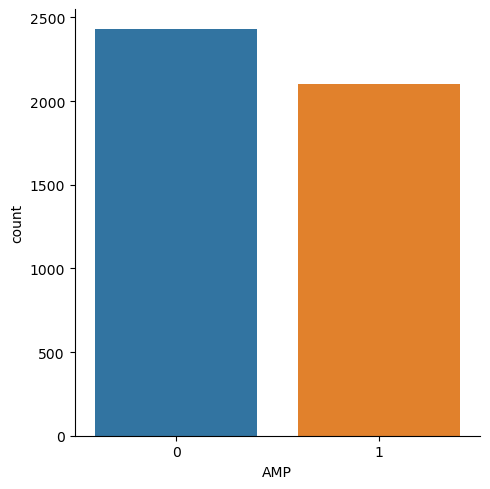

In [6]:
# checking distribuition
sns.catplot(x="AMP", data=data, kind="count")
plt.show()

In [7]:
# define target
target= data.pop('AMP')
target

0       1
1       1
2       1
3       1
4       1
       ..
7099    0
7100    0
7101    0
7102    0
7103    0
Name: AMP, Length: 4531, dtype: int64

In [8]:
# Defining features
features = data.iloc[:, 10:]
features

,1,2,3,4,5,6,7,8,9,10,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,0.059186,0.004249,0.109922,0.207761,-0.121233,0.058920,-0.248281,0.049932,-0.181587,-0.108272,...,0.218652,-0.102183,-0.135106,-0.226512,-0.648561,-0.037827,0.114281,0.068507,0.136238,0.191664
1,0.075818,-0.009753,0.145613,0.204047,-0.145136,0.005833,-0.223655,0.088040,-0.223693,-0.126281,...,0.260551,-0.116178,-0.131530,-0.172210,-0.648893,0.009256,0.160991,0.036820,0.119622,0.174005
2,0.062759,-0.005796,0.134629,0.235778,-0.026588,0.091254,-0.299127,0.041034,-0.277806,-0.172488,...,0.243991,-0.065191,-0.125519,-0.210318,-0.748954,-0.009328,0.175478,0.028116,0.093821,0.164796
3,0.046557,0.090821,0.066255,0.169228,-0.150511,0.062457,-0.181175,0.060794,-0.214309,-0.119806,...,0.222436,-0.081373,-0.129518,-0.166377,-0.676122,-0.019763,0.141659,0.056279,0.146918,0.183972
4,0.107842,0.016787,0.144453,0.119029,-0.102316,0.024559,-0.236044,0.079709,-0.233285,-0.034261,...,0.240309,-0.135205,-0.090638,-0.084837,-1.013979,0.037765,0.113964,-0.007282,0.153006,0.109544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,0.090059,-0.098031,0.094370,0.168716,-0.094469,-0.098667,-0.297127,0.117674,-0.371265,-0.081191,...,0.340728,-0.132581,-0.103674,-0.095682,-1.007175,-0.128635,0.205310,0.094307,0.047961,0.020077
7100,0.023885,0.044051,0.122493,0.192090,-0.135635,0.046474,-0.237551,0.125943,-0.232363,-0.105991,...,0.253365,-0.081793,-0.127632,-0.177695,-0.662197,0.032730,0.152414,0.013013,0.156766,0.202220
7101,0.059393,-0.020913,0.141866,0.217784,-0.029127,0.008050,-0.321206,0.090203,-0.318012,-0.084846,...,0.269381,-0.154193,-0.134896,-0.089636,-1.031414,-0.015623,0.125306,0.005631,0.084304,0.142760
7102,0.057057,-0.109226,0.144110,0.142729,-0.091273,0.002220,-0.247475,0.051716,-0.156309,-0.054732,...,0.331268,-0.158191,-0.092521,-0.062302,-1.056767,-0.105705,0.160194,0.046761,0.184799,-0.014744


**Note: Do NOT forget to check the dimension of the features data set, has to be (num_samples,1280).**

In [9]:
## Data scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features = pd.DataFrame(scaler.fit_transform(features))

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# check the data
print(f'Test set shape: {X_test.shape}\nTrain set shape: {X_train.shape}')

Test set shape: (907, 1280)
Train set shape: (3624, 1280)


In [12]:
# check the data
print(f'Test set shape: {y_test.shape}')

Test set shape: (907,)


## Define the Model

**Suport Vector Mahine**

In [13]:
## define the model
model = svm.SVC() # Linear Kernel
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [15]:
%%time
svm_grid = {
    'kernel': ['rbf'],
    'C': [1.0, 10, 100, 1000, 10000],
    'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'max_iter': [-1],
    'class_weight': [None, 'balanced'],
    }

cv = 10

# Define search
search = GridSearchCV(model, svm_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)

# Perform the search
results = search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Mean Accuracy of 10 cross validation: 0.813
Params: {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1}

CPU times: user 15.2 s, sys: 1.2 s, total: 16.4 s
Wall time: 6min 27s


In [16]:
# Summarize
print(f'Mean Accuracy of {cv} cross validation: %.3f' %results.best_score_)
print('Params: %s' %results.best_params_)
print()

Mean Accuracy of 10 cross validation: 0.813
Params: {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1}



**Results from the model with differents parameters**    
esm1b
Fitting 5 folds for each of 25 candidates, totalling 125 fits  
Mean Accuracy of 5 cross validation: 0.808  
Params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100000}  
Wall time: 2min 27s  

esm1b
Fitting 10 folds for each of 50 candidates, totalling 500 fits  
Mean Accuracy of 10 cross validation: 0.813  
Params: {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1}  
Wall time: 10min 10s  

## Fine tunning

In [17]:
# fit the model with the best hyperparameter found with gridSearch
model= svm.SVC(kernel= 'rbf',
                C= results32.best_params_["C"],
                gamma= results32.best_params_["gamma"],
                max_iter= -1, 
                probability = True
                )

model.fit(X_train, y_train)

SVC(C=1000, gamma=0.001, probability=True)

## Cross validation scorring

In [19]:
# Cross validation with accuracy
accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross validation of test set for accuracy score is: {accuracy}')
print(f'Mean Cross validation of test set for accuracy score is: {np.mean(accuracy)}')

Cross validation of test set for accuracy score is: [0.77961433 0.7768595  0.80440771 0.79614325 0.79005525 0.80110497
 0.84254144 0.8121547  0.81491713 0.83149171]
Mean Cross validation of test set for accuracy score is: 0.8049289986758594


In [20]:
# Cross validation with precision
precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')
print(f'Cross validation of test set for precision score is: {precision}')
print(f'Mean Cross validation of test set for precision score is: {np.mean(precision)}')

Cross validation of test set for precision score is: [0.75144509 0.73626374 0.76966292 0.75690608 0.78481013 0.76111111
 0.80110497 0.76923077 0.77966102 0.81176471]
Mean Cross validation of test set for precision score is: 0.7721960523796674


In [21]:
# Cross validation with recall
recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
print(f'Cross validation of test set for recall score is: {recall}')
print(f'Mean Cross validation of test set for recall score is: {np.mean(recall)}')

Cross validation of test set for recall score is: [0.77844311 0.80239521 0.82035928 0.82035928 0.74698795 0.8253012
 0.87349398 0.84337349 0.8313253  0.82634731]
Mean Cross validation of test set for recall score is: 0.8168386119327609


In [22]:
# Cross validation with f1
f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
print(f'Cross validation of test set for f1 score is: {f1}')
print(f'Mean Cross validation of test set for f1 score is: {np.mean(f1)}')

Cross validation of test set for f1 score is: [0.76470588 0.76790831 0.7942029  0.78735632 0.7654321  0.79190751
 0.83573487 0.8045977  0.80466472 0.8189911 ]
Mean Cross validation of test set for f1 score is: 0.7935501417835982


In [23]:
# Cross validation with AUC
roc_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
print(f'Cross validation of test set for roc_auc score is: {roc_auc}')
print(f'Mean Cross validation of test set for roc_auc score is: {np.mean(roc_auc)}')

Cross validation of test set for roc_auc score is: [0.85772333 0.85680679 0.88466944 0.85320176 0.85981682 0.87961028
 0.90834768 0.88314482 0.8854807  0.89933978]
Mean Cross validation of test set for roc_auc score is: 0.8768141396841657


## Evaluation of the model

In [24]:
# Making predictions
y_pred = model.predict(X_test)

#accuracy_score
metrics.accuracy_score(y_test, y_pred)

0.8136714443219405

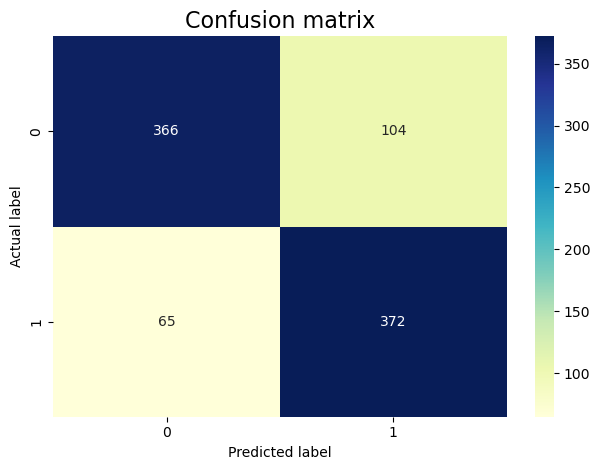

In [25]:
#confusion_matrix, 
conf_m = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

**Goal is decrease true positives predicted as 0**  
The test set has 907 samples.  
104 out 907 were wrongly predicted as active.   
65 out of 907 were wrongly predicted as non-active.

In [26]:
# Test set Model Evaluation
def model_evaluate(y_test, y_pred):
    # accuracy_score
    acc = metrics.accuracy_score(y_test, y_pred)

    # pre - precision_score
    pre = metrics.precision_score(y_test, y_pred)

    # rec - recall_score he recall of the model assesses its ability to recognize Positive samples. 
    # The more Positive samples identified, the larger the recall.
    rec = metrics.recall_score(y_test, y_pred)

    # f1 score
    f1 = metrics.f1_score(y_test, y_pred)

    # AUC - area under the curve
    auc = metrics.roc_auc_score(y_test, y_pred)

    print(f'Accuracy value for the data tested is: {acc}')
    print(f'Precision for the data tested is: {pre}')
    print(f'Recall for the data tested is: {rec}')
    print(f'F1 score for the data tested is: {f1}')
    print(f'AUC for the data tested is: {auc}')


model_evaluate(y_test, y_pred)

Accuracy value for the data tested is: 0.8136714443219405
Precision for the data tested is: 0.7815126050420168
Recall for the data tested is: 0.851258581235698
F1 score for the data tested is: 0.814895947426068
AUC for the data tested is: 0.8149909927455086


## Making predictions on Protegrin dataset.
The peptides on this dataset were choosed based on its values of log2 fold changes from slay analysis.

In [75]:
data_test = pd.read_csv('embeddings/esm1b_embed_Cumulative_Peptide_data_v03_PG1.csv', index_col=0)
data_test.head()

,ID,Sequence,MH MIC,MH MBC,%Hemolysis,Strain,Source,1,2,3,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,PG-1.37,HVRRLCYCRRRFCACVGS,1,1,2.620152,W3110,PG lib,0.047868,-0.155858,0.110048,...,0.317235,-0.088747,-0.105917,-0.107582,-1.054819,-0.084666,0.104443,0.069650,0.164148,0.044013
1,PG-1.34,RGWRLGYCRRRFCVSIGR,2,2,22.477368,W3110,PG lib,0.114215,-0.091673,0.126003,...,0.288557,-0.099513,-0.058121,-0.054183,-0.930606,-0.039024,0.167196,0.085399,0.128609,0.034707
2,PG-1.0,RGGRLCYCRRRFCVCVGR,4,4,56.421579,W3110,PG lib,0.069356,0.014412,0.153988,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
3,PG-1.16,RGGRLCYCRRRFCVCLGS,4,4,63.339957,W3110,PG lib,0.053567,0.009312,0.119106,...,0.245680,-0.077438,-0.109272,-0.176999,-0.743938,-0.011029,0.166215,0.038268,0.125609,0.161980
4,PG-1.20,RGGRLRYCHRRFCVSVGR,4,4,1.030397,W3110,PG lib,0.085580,0.061993,0.134818,...,0.301373,-0.190067,-0.170567,-0.167647,-0.821778,0.067867,0.176653,0.100257,0.113895,0.075450


In [76]:
def convert_mic(mic_value):
    if type(mic_value) == str and mic_value.startswith('>'):
        mic_value = float(mic_value.replace('>', ''))
        v = mic_value*2
        return v
    else:
        return float(mic_value)

convert_mic('>64')

128.0

In [77]:
data_test["MH MIC"] = [convert_mic(x) for x in data_test["MH MIC"]]

In [78]:
# define target to evaluete the model
y_test2 = [1 if x <= 64 else 0 for x in data_test["MH MIC"]]
print(f'Number of non-AMP: {y_test2.count(0)}\nNumber of AMP: {y_test2.count(1)}') 

Number of non-AMP: 14
Number of AMP: 34


In [82]:
# define features
features2 = data_test.iloc[:, 7:]
features2.shape

(48, 1280)

In [83]:
# fetures scaling
X_test2 = pd.DataFrame(scaler.fit_transform(features2))
X_test2

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.591771,0.000000,0.448479,0.341173,0.352005,0.456347,0.441649,0.587134,0.676198,0.918403,...,0.685566,0.487677,0.442177,0.687440,0.000000,0.245714,0.086147,0.727102,0.624911,0.444987
1,0.970053,0.229490,0.502050,0.590094,0.283796,0.309008,0.184147,0.235962,0.620646,0.766348,...,0.549651,0.435859,0.684084,0.996102,0.201240,0.420095,0.435713,0.821502,0.425949,0.414692
2,0.714287,0.608792,0.596012,0.722354,0.324196,0.604759,0.412568,0.165261,0.456480,0.296830,...,0.278619,0.469066,0.414641,0.134478,0.697641,0.527309,0.306935,0.512947,0.355281,0.950869
3,0.624267,0.590558,0.478893,0.909387,0.466462,0.497230,0.339952,0.149069,0.568574,0.492048,...,0.346441,0.542111,0.425200,0.286192,0.503666,0.527057,0.430251,0.538985,0.409151,0.829046
4,0.806791,0.778917,0.531645,0.756708,0.241057,0.421244,0.000000,0.122652,0.322926,0.676921,...,0.610392,0.000000,0.114975,0.340249,0.377556,0.828494,0.488396,0.910569,0.343573,0.547335
5,0.941824,0.586296,0.584878,0.830142,0.506799,0.484848,0.237592,0.197598,0.548646,0.171480,...,0.473213,0.669894,0.364011,0.238200,0.409898,0.732521,0.333828,0.774407,0.509923,0.651214
6,0.650132,0.610258,0.649452,0.584583,0.405127,0.679176,0.383299,0.180369,0.573278,0.277975,...,0.234236,0.539308,0.445425,0.062051,0.606433,0.440610,0.191499,0.537245,0.566768,0.857706
7,0.604861,0.221687,0.814168,0.593837,0.592794,0.518987,0.262917,0.430411,0.365484,0.591633,...,0.567290,0.449908,0.527578,0.430065,0.214252,0.440126,0.199493,0.494986,0.439832,0.838083
8,0.760409,0.532251,0.587105,0.751405,0.365909,0.487218,0.372920,0.251263,0.504006,0.370435,...,0.306059,0.461446,0.367809,0.284011,0.563878,0.528121,0.445157,0.628030,0.284241,0.870064
9,0.818623,0.421546,0.594502,0.652812,0.198855,0.516856,0.258906,0.345093,0.604618,0.734456,...,0.412907,0.165769,0.286183,0.448055,0.364822,0.515548,0.126674,0.835633,0.608631,0.928973


In [84]:
# Making predictions
pred2 = model.predict(X_test2)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [85]:
# Making predictions
y_pred2 = model.predict(X_test2)

#accuracy_score
metrics.accuracy_score(y_test2, y_pred2)

0.8958333333333334

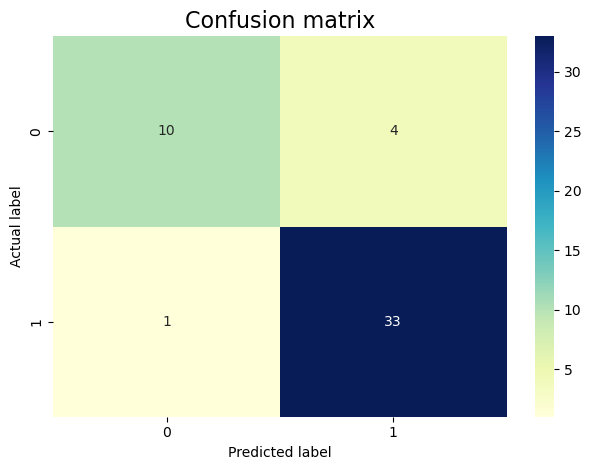

In [86]:
# confusion_matrix, 
conf_m = metrics.confusion_matrix(y_test2, y_pred2)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [87]:
# Test set Model Evaluation
def model_evaluate(y_test, y_pred):
    # accuracy_score
    acc = metrics.accuracy_score(y_test, y_pred)

    # pre - precision_score
    pre = metrics.precision_score(y_test, y_pred)

    # rec - recall_score he recall of the model assesses its ability to recognize Positive samples. 
    # The more Positive samples identified, the larger the recall.
    rec = metrics.recall_score(y_test, y_pred)

    # f1 score
    f1 = metrics.f1_score(y_test, y_pred)

    # AUC - area under the curve
    auc = metrics.roc_auc_score(y_test, y_pred)

    print(f'Accuracy value for the data tested is: {acc}')
    print(f'Precision for the data tested is: {pre}')
    print(f'Recall for the data tested is: {rec}')
    print(f'F1 score for the data tested is: {f1}')
    print(f'AUC for the data tested is: {auc}')


model_evaluate(y_test2, y_pred2)

Accuracy value for the data tested is: 0.8958333333333334
Precision for the data tested is: 0.8918918918918919
Recall for the data tested is: 0.9705882352941176
F1 score for the data tested is: 0.9295774647887325
AUC for the data tested is: 0.842436974789916


In [88]:
# get probabilities
prob = model.predict_proba(test)
prob[:5]

array([[0.36517105, 0.63482895],
       [0.07866476, 0.92133524],
       [0.04065045, 0.95934955],
       [0.05964661, 0.94035339],
       [0.07630755, 0.92369245]])

In [91]:
# add probabilities to the df
data_test['probability_to_be_AMP'] = [str(round(x[1]*100))+'%' for x in prob]
cols = ['ID', 'Sequence', 'MH MBC', 'probability_to_be_AMP']

#data_test.loc[:,cols].to_excel('predictions_with_esm1b.xlsx')
res_test = data_test.loc[:,cols]
res_test

,ID,Sequence,MH MBC,probability_to_be_AMP
0,PG-1.37,HVRRLCYCRRRFCACVGS,1,63%
1,PG-1.34,RGWRLGYCRRRFCVSIGR,2,92%
2,PG-1.0,RGGRLCYCRRRFCVCVGR,4,96%
3,PG-1.16,RGGRLCYCRRRFCVCLGS,4,94%
4,PG-1.20,RGGRLRYCHRRFCVSVGR,4,92%
5,PG-1.33,LSGRLCYCRRRFCVCLRR,4,99%
6,PG-1.1,RGGRLCYCRRRSCVCVGR,8,96%
7,PG-1.14,RGVRLCYCRRRLCVCVGR,8,99%
8,PG-1.15,RGVRLCYCRRRFCVCLGR,8,95%
9,PG-1.21,RGVHLCYCRRRYCVCVGR,8,84%


In [92]:
#res_test.to_excel('predictions/predictions_esm1b_PG1.xlsx')

## Saving the model

In [95]:
import pickle
  
# Save the trained model as a pickle string.
#pickle.dump(model, open('predictions/SCV_model_esm1b_v01.pkl', 'wb'))  